## Load packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

CURRENT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.append(PARENT_DIR)

from FDApy.local_polynomial import LocalPolynomial

from sklearn.preprocessing import PolynomialFeatures

## Generate 1D data

In [2]:
X = np.random.normal(0, 1, 100)
Y = 2 * np.sin(X) + np.random.normal(0, 0.25, 100)
Y_true = 2 * np.sin(np.linspace(-2, 2, 200))

### Fit using local regression

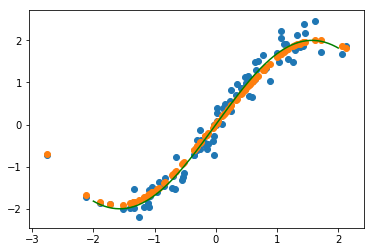

In [3]:
lp = LocalPolynomial(kernel="epanechnikov", bandwidth=2, degree=2)
lp.fit(X, Y)

plt.scatter(X, Y)
plt.scatter(np.sort(X), lp.X_fit_)
plt.plot(np.linspace(-2, 2, 200), Y_true, 'green')
plt.show()

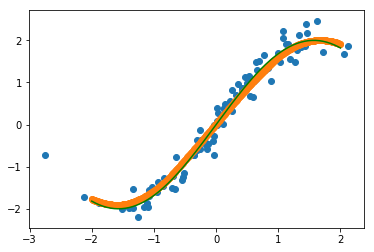

In [4]:
y_pred = lp.predict(np.linspace(-2, 2, 500))

plt.scatter(X, Y)
plt.scatter(np.linspace(-2, 2, 500), y_pred)
plt.plot(np.linspace(-2, 2, 200), Y_true, 'green')
plt.show()

## Generate 2D data

In [5]:
x = np.random.randn(2, 100)
f = -1 * np.sin(x[0]) + 0.5 * np.cos(x[1]) + 0.2*np.random.randn(100)
x0 = np.mgrid[-1:1:.1, -1:1:.1]
x0 = np.vstack([x0[0].ravel(), x0[1].ravel()])

### Fit using local regression

In [6]:
lp = LocalPolynomial(kernel="epanechnikov", bandwidth=2, degree=1)
lp.fit(x, f)

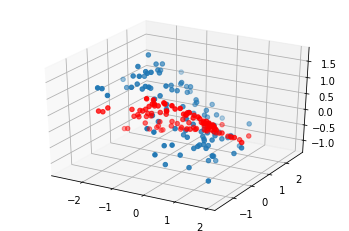

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(x[0], x[1], f)
_ = ax.scatter(x[0], x[1], lp.X_fit_, color='r')

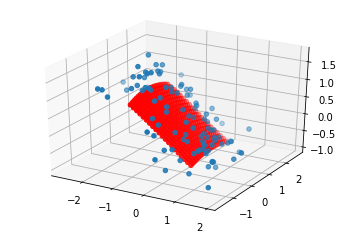

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(x[0], x[1], f)
_ = ax.scatter(x0[0], x0[1], lp.predict(x0), color='r')